# Oasis Infobytes : Data Science Internship
## Task 5 : Sales Prediction using Python
### Name of Intern : Sanjay Divate

## Importing Libraries

In [41]:
import numpy as np # used in scientific and mathematical calculation.
import pandas as pd #used for data cleaning, preparation, and analysis.
import matplotlib.pyplot as plt #used for creating static and interactive visualizations.
import seaborn as sns #used for creating some advance visualizations.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings # to suppress specific warnings that might be generated by third-party libraries or your own code.
warnings.filterwarnings("ignore")

## **Data Cleaning and Processing**

In [42]:
# Loading the Dataset from csv file.
df = pd.read_csv("Advertising.csv")

In [43]:
# Displaying the data from the Dataset.
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [44]:
# Displaying First 5 rows of the Dataset.
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [45]:
# Displaying last 5 rows of the Dataset.
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [46]:
#Displaying total count of data points in the DataFrame(No. of Columns * No. of rows).
df.size

1000

In [47]:
# Displaying No. of rows, No. of Columns.
df.shape

(200, 5)

In [48]:
#Getting some information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [49]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## **Data Cleaning**

In [50]:
df.drop(columns=['Unnamed: 0'], axis= 1, inplace = True)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [51]:
# checking for missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [52]:
# Checking for Duplicate Values
Duplicates = df.duplicated().sum()
print("Total Number of Duplicate records :",Duplicates)

Total Number of Duplicate records : 0


In [63]:
df['Species'].value_counts()

KeyError: 'Species'

## **Data Visualization**

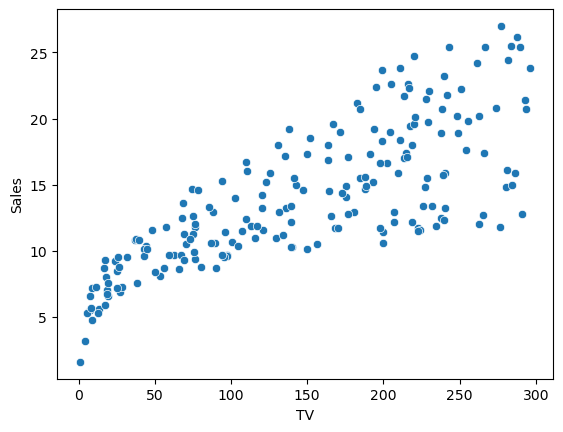

In [53]:
sns.scatterplot(x='TV', y='Sales', data=df)
plt.show()

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

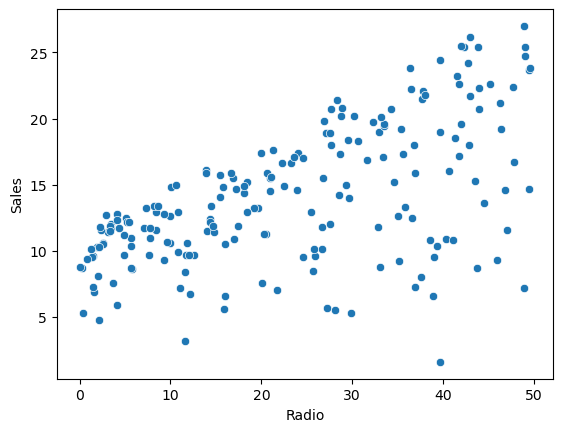

In [54]:
sns.scatterplot(x='Radio', y='Sales', data=df)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

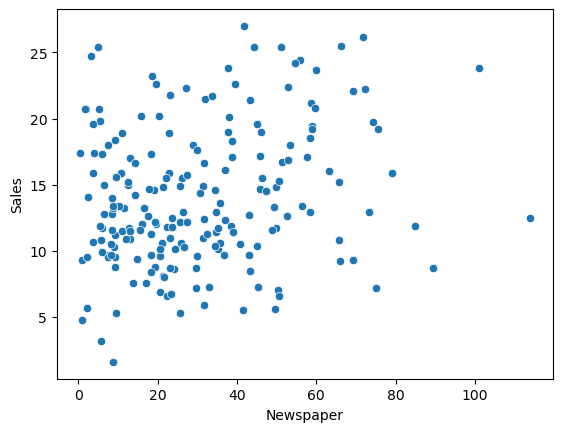

In [55]:
sns.scatterplot(x='Newspaper', y='Sales', data=df)

<AxesSubplot:>

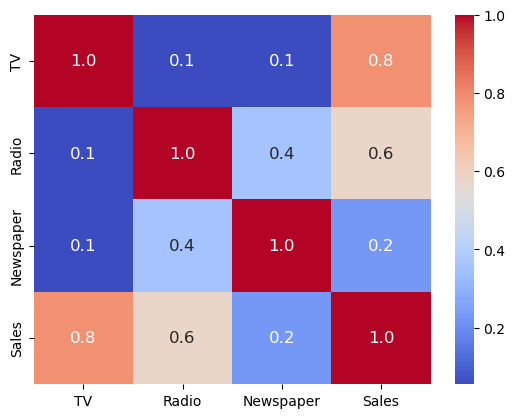

In [56]:
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='coolwarm', annot_kws={"size": 12})

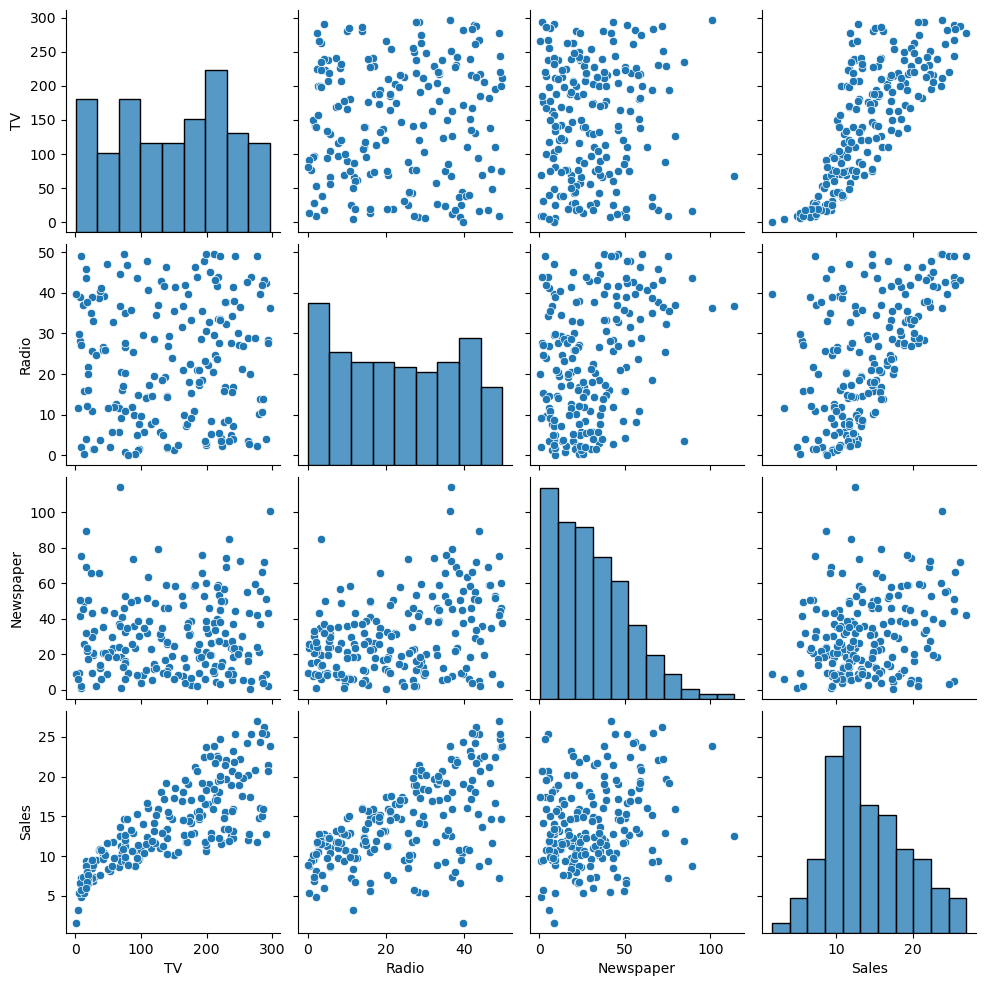

In [57]:
# Pairplot
sns.pairplot(df[['TV', 'Radio', 'Newspaper', 'Sales']])
plt.show()

In [61]:
# Separate features and target
data=df.values

# slicing the matrices
X = data[:,0:4]
Y = data[:,5]


IndexError: index 5 is out of bounds for axis 1 with size 4

## **Data Modelling**

In [21]:
x = df.drop(['Sales'],1)
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [22]:
y = df['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [23]:
#test-train split
from sklearn.model_selection import train_test_split

## **Model Training**

In [34]:
# Split the data into Training and Testing model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [25]:
from sklearn.linear_model import LinearRegression

In [32]:
# Create and train the model
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [33]:
# Make predictions
predictions = model.predict(X_test)
predictions

NameError: name 'model' is not defined

In [28]:
coefficient = model_lr.coef_
coefficient

array([0.0455864 , 0.18569816, 0.00223281])

In [29]:
intercept = model_lr.intercept_
intercept

2.8172751352950005

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100

91.84369032278497